In [1]:
import sys
sys.path.append('/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/')
from PMTanalysis import *
PMT = PMTanalyzer('/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/configuration_led_window.ini')





___   ___  _______ .__   __.   ______   .__   __.        .___________.   __  __             _____    _____    ____  
\  \ /  / |   ____||  \ |  |  /  __  \  |  \ |  |        |           |  |  \/  |    /\     / ____|  |_   _| /  ___| 
 \  V  /  |  |__   |   \|  | |  |  |  | |   \|  |  _   _ `---|  |----`  | \  / |   /  \    | |  __    | |   | |      
  >   <   |   __|  |  . `  | |  |  |  | |  . `  | | \ | |    |  |       | |\/| |  / /\ \   | | |_ |   | |   | |      
 /  .  \  |  |____ |  |\   | |  `--`  | |  |\   | |  \| |    |  |       | |  | | / ____ \  | |__| |  _| |_  | |___  
/__/ \__\ |_______||__| \__|  \______/  |__| \__| |_|\__|    |__|       |_|  |_|/_/    \_\ \ _____| |_____| \_____|  
powered by Giovanni Volta, Chiara Capelli and Shingo Kazama (c)




Configuration file:  /home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/configuration_led_window.ini


In [2]:
Config = cp.ConfigParser()
Config.read(PMT.config_file)

led_window   = [Config.getint('window_pars','led_windows_left'), 
                Config.getint('window_pars','led_windows_right')]
noise_window = [Config.getint('window_pars','noise_windows_left'), 
                Config.getint('window_pars','noise_windows_right')]
print(led_window, noise_window)

[75, 110] [30, 65]


In [3]:
import strax
print(strax.__file__)
import straxen
print(straxen.__file__)
strax.Mailbox.DEFAULT_MAX_MESSAGES = 2
st = straxen.contexts.xenonnt_led()

## 75 - 90 ; 75 - 95; 75 - 100; 75 - 105; 75 - 110; 75 - 115; 75 - 120
#st = st.new_context(config=dict(led_window=(led_window[0], led_window[0]), 
#                                noise_window=(noise_window[0], noise_window[0])
                                
st = st.new_context(storage=[strax.DataDirectory(PMT.straxdata, provide_run_metadata=False)], 
                     config=dict(led_window=(led_window[0],led_window[1]), 
                                 noise_window=(noise_window[0], noise_window[1]),
                                 channel_list=(0,494)))
st.show_config('led_calibration')

/dali/lgrandi/strax/strax/strax/__init__.py
/home/gvolta/XENONnT/straxen/straxen/__init__.py


/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")


,option,default,current,applies_to,help
0,baseline_window,"(0, 50)",<OMITTED>,"(led_calibration,)",Window (samples) for baseline calculation.
1,led_window,"(75, 100)","(75, 110)","(led_calibration,)",Window (samples) where we expect the signal in LED calibration
2,noise_window,"(35, 60)","(30, 65)","(led_calibration,)",Window (samples) to analysis the noise
3,channel_list,"(0, 494)","(0, 494)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
4,record_length,110,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Number of samples per raw_record
5,digitizer_sampling_resolution,10,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Digitizer sampling resolution
6,run_start_time,0,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",time of start run (s since unix epoch)
7,daq_chunk_duration,5000000000,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Duration of regular chunks in ns
8,daq_overlap_chunk_duration,500000000,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Duration of intermediate/overlap chunks in ns
9,daq_compressor,lz4,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Algorithm used for (de)compressing the live data


In [4]:
st.data_info('led_calibration')

/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")


,Field name,Data type,Comment
0,area_led,float64,Area averaged in integration LED windows
1,area_noise,float64,Area averaged in integration noise windows
2,amplitude_led,int32,Amplitude in LED window
3,amplitude_noise,int32,Amplitude in off LED window
4,channel,int16,Channel
5,time,int64,Start time of the interval (ns since unix epoch)
6,dt,int16,Time resolution in ns
7,length,int32,Length of the interval in samples


In [5]:
!ls /dali/lgrandi/giovo/XENONnT/strax_data/

007333-led_calibration-7f5pd3wm6e  007338-led_calibration-7f5pd3wm6e
007333-led_calibration-qsvx2z734h  007339-led_calibration-7f5pd3wm6e
007334-led_calibration-7f5pd3wm6e  007340-led_calibration-7f5pd3wm6e
007334-led_calibration-qsvx2z734h  007341-led_calibration-7f5pd3wm6e
007335-led_calibration-7f5pd3wm6e  007341-led_calibration-qsvx2z734h
007335-led_calibration-qsvx2z734h  180219_1049-led_calibration-wwtqsw57ux
007336-led_calibration-7f5pd3wm6e  180219_1059-led_calibration-wwtqsw57ux
007336-led_calibration-qsvx2z734h  old_env


In [6]:
run = '007339'
st.size_mb(run, 'led_calibration')

/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")


6012.9544

In [7]:
data = st.get_array(run, 'led_calibration', max_workers=20, seconds_range=(0,30))
#rr = st.get_array(run, 'led_calibration', max_workers=20, second_range=(0,1))

In [8]:
len(data['area_led'])

34559100

### Occupancy estimation

In [9]:
led = np.zeros(len(data), dtype = np.dtype([('channel', 'int16'), ('area', 'float64')]))
noise = np.zeros(len(data), dtype = np.dtype([('channel', 'int16'), ('area', 'float64')]))
led['channel'] = data['channel']
led['area'] = data['area_led']
noise['channel'] = data['channel']
noise['area'] = data['area_noise']

In [10]:
channels = np.arange(0, 494, 1)

In [11]:
bad_ch = [ ]
for ch in channels:
    try:
        PMT.get_moments(led, [ch])
        PMT.get_moments(noise, [ch])
    except:
        bad_ch.append(ch)
good_ch = [ ]
for ch in channels:
    if ch not in bad_ch:
        good_ch.append(ch)
bad_ch = np.asarray(bad_ch)

In [12]:
Occ = PMT.get_occupancy(led, noise, channels, bad_ch)

/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/PMTanalysis.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  if l_err/l <= 0.05:


########
PMT  58  is a bad channel
########
########
PMT  60  is a bad channel
########
########
PMT  74  is a bad channel
########
########
PMT  75  is a bad channel
########
########
PMT  90  is a bad channel
########
########
PMT  92  is a bad channel
########
########
PMT  93  is a bad channel
########
########
PMT  107  is a bad channel
########
########
PMT  108  is a bad channel
########
########
PMT  122  is a bad channel
########
########
PMT  123  is a bad channel
########
########
PMT  125  is a bad channel
########
########
PMT  126  is a bad channel
########
########
PMT  140  is a bad channel
########
########
PMT  141  is a bad channel
########
########
PMT  143  is a bad channel
########
########
Check PMT  185 , it has occupancy <= 0
########
########
Check PMT  237 , it has occupancy <= 0
########
########
PMT  277  is a bad channel
########
########
PMT  290  is a bad channel
########
########
PMT  303  is a bad channel
########
########
PMT  306  is a bad channel
##

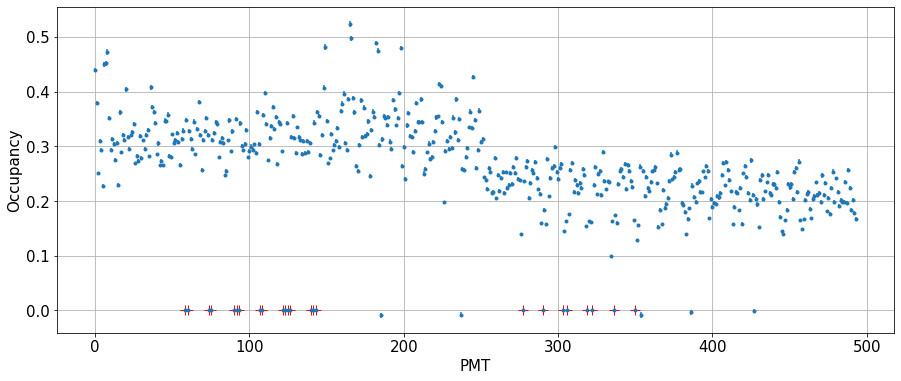

In [13]:
plt.figure(figsize=(15, 6))
plt.errorbar(channels, Occ['estimated occupancy'], yerr=Occ['estimated occupancy error'],
             fmt='.')
plt.plot(bad_ch, np.zeros(len(bad_ch)), 'r+', ms=10)
plt.xlabel('PMT', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()

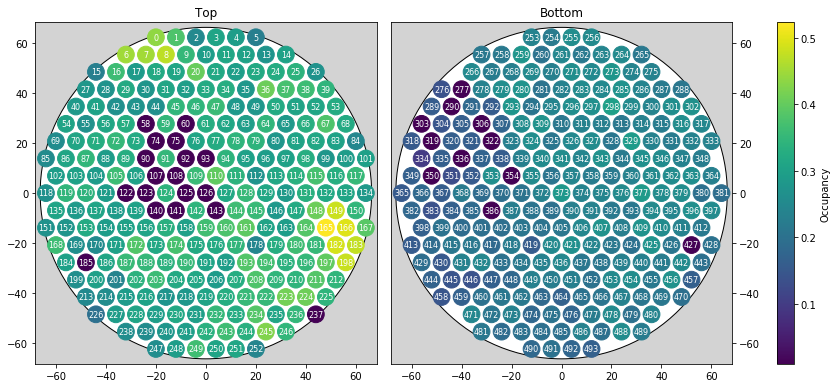

In [14]:
straxen.plot_pmts(Occ['estimated occupancy'], vmin=0.01, label=f'Occupancy')

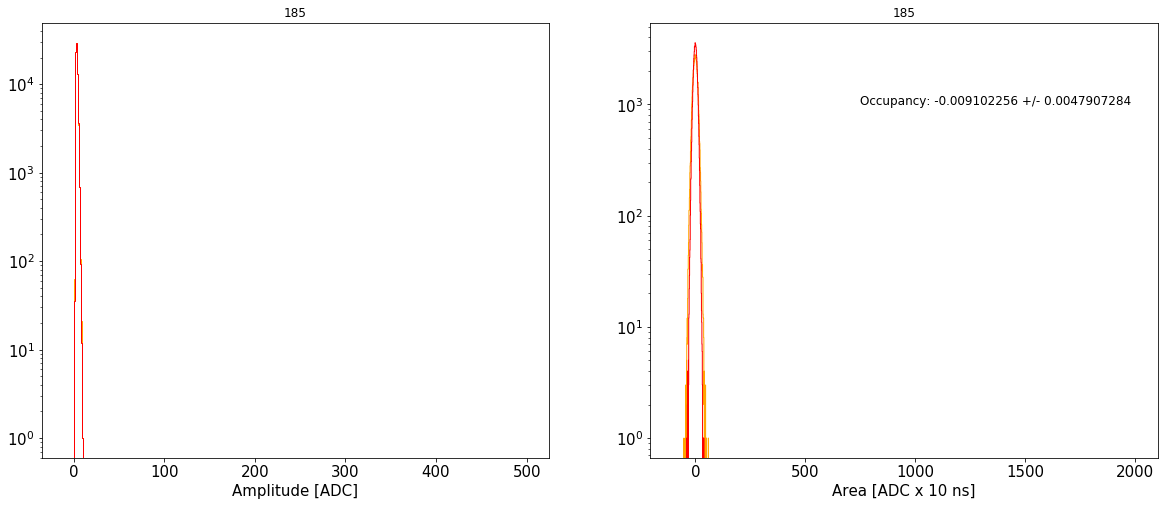

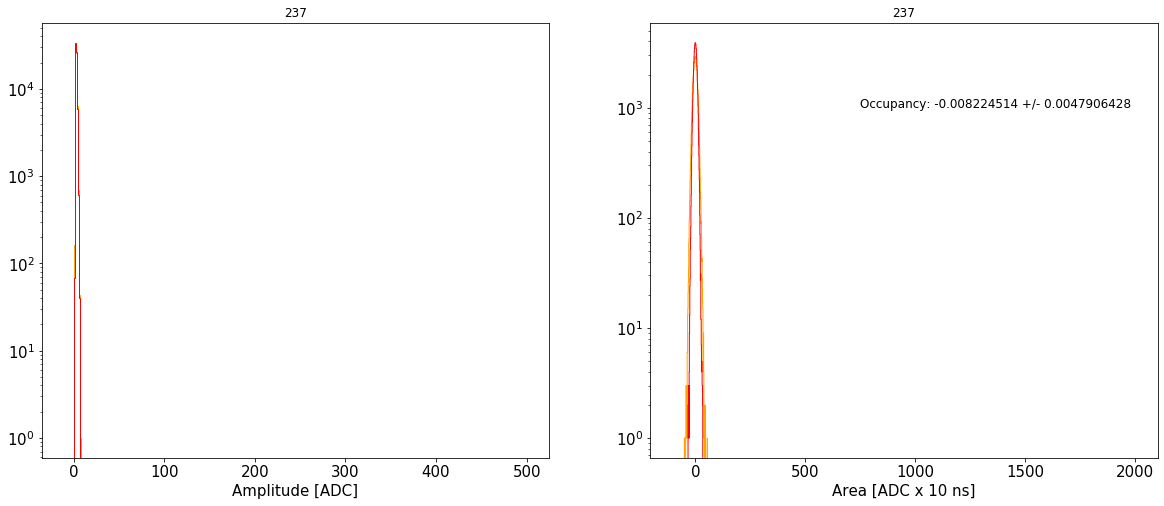

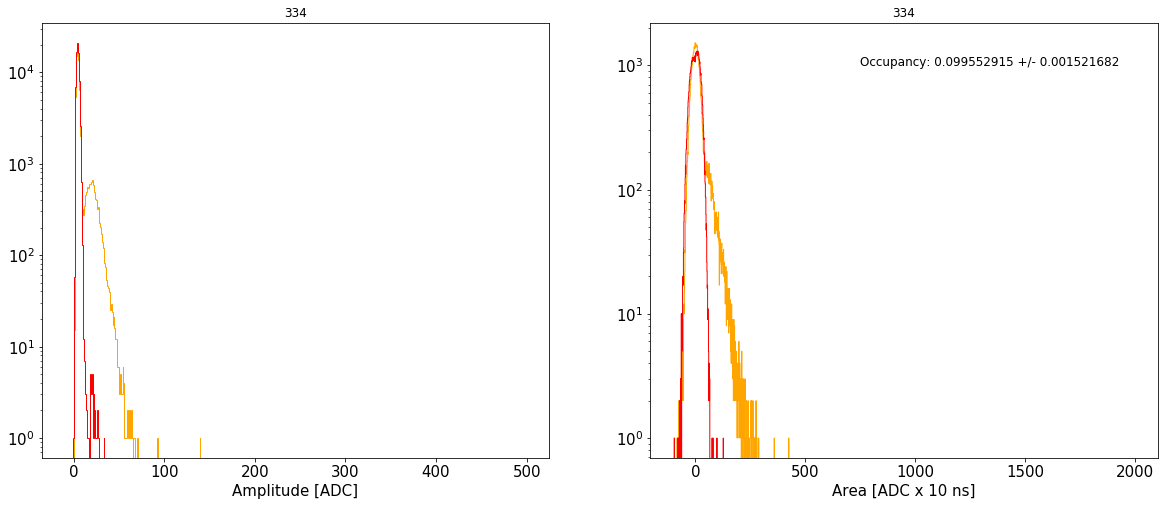

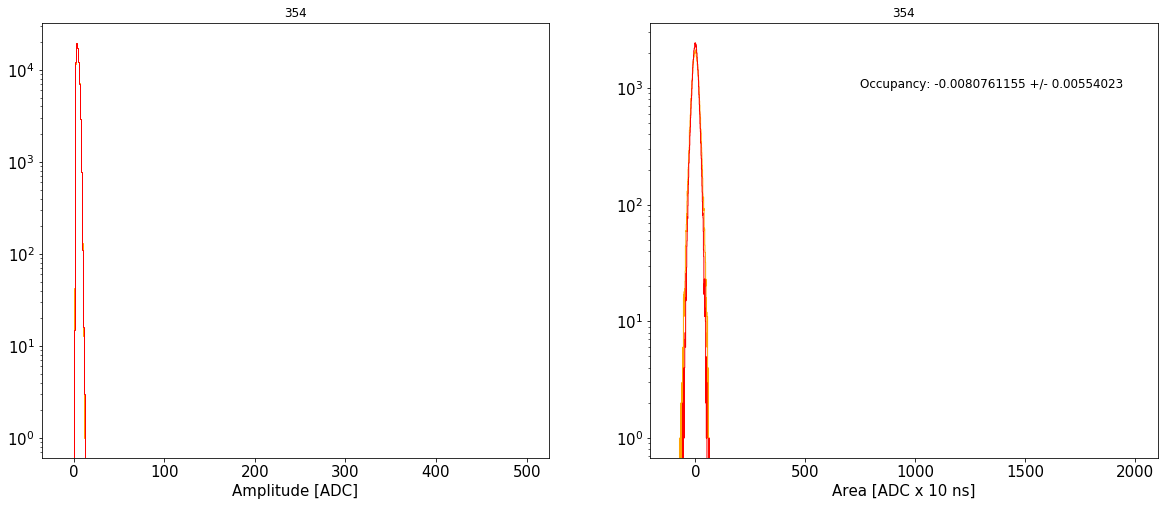

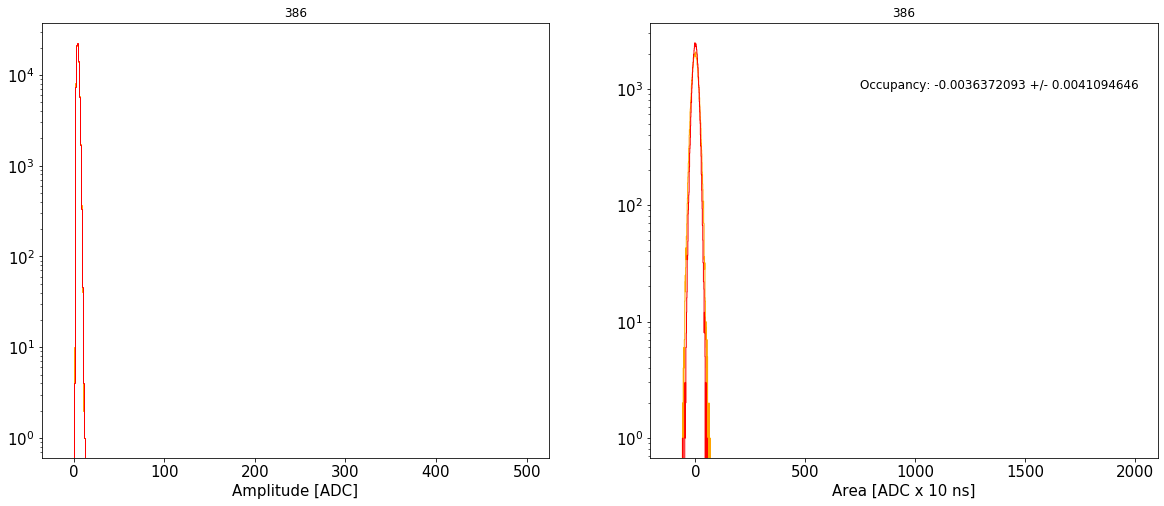

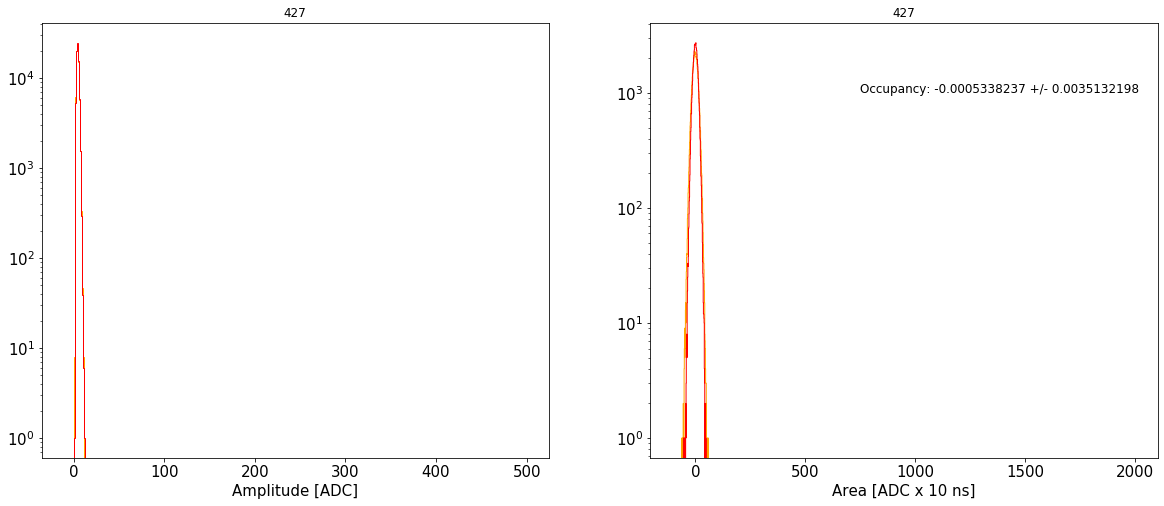

In [15]:
strange_ch = Occ[Occ['estimated occupancy']<0.1]['channel']

for ch in strange_ch:
    if ch not in bad_ch:
        plt.figure(figsize=(20, 8))

        plt.subplot(121)
        ADC = np.arange(-10, 500, 1)
        plt.hist(data[data['channel']==ch]['amplitude_led'], bins=ADC, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['amplitude_noise'], bins=ADC, histtype='step',color='red')
        plt.title(str(ch))
        plt.xlabel('Amplitude [ADC]', fontsize=15)
        plt.tick_params(labelsize=15)
        plt.yscale('log')

        plt.subplot(122)
        ADC_area = np.arange(-100, 2000, 1)
        plt.hist(data[data['channel']==ch]['area_led'], bins=ADC_area, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['area_noise'], bins=ADC_area, histtype='step',color='red')
        plt.title(str(ch))
        plt.xlabel('Area [ADC x 10 ns]', fontsize=15)
        plt.tick_params(labelsize=15)
        plt.text(x=750, y=1e3, 
         s='Occupancy: ' + str(Occ[Occ['channel']==ch]['estimated occupancy'][0])+' +/- '
           +str(Occ[Occ['channel']==ch]['estimated occupancy error'][0]), fontsize=12)
        plt.yscale('log')

        plt.show()

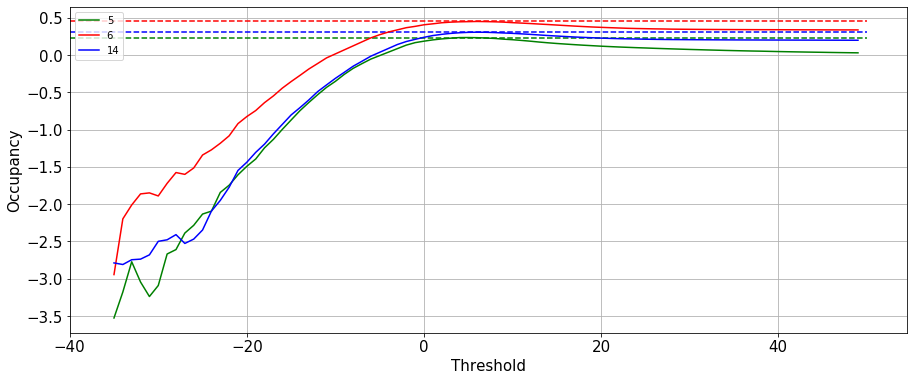

In [16]:
plt.figure(figsize=(15,6))
ch = 5
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy'][0], 'g-', label=str(ch))
plt.hlines(Occ[Occ['channel']==ch]['estimated occupancy'], xmin=-40, xmax=50, color='green', linestyles='dashed')

ch = 6
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy'][0], 'r-', label=str(ch))
plt.hlines(Occ[Occ['channel']==ch]['estimated occupancy'], xmin=-40, xmax=50, color='red', linestyles='dashed')

ch = 14
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy'][0], 'b-', label=str(ch))
plt.hlines(Occ[Occ['channel']==ch]['estimated occupancy'], xmin=-40, xmax=50, color='blue', linestyles='dashed')

plt.legend(loc=0)
plt.xlim(-40)

plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()

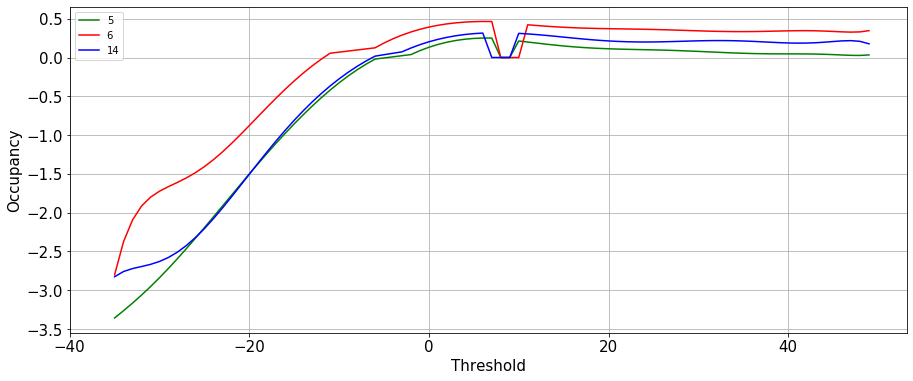

In [17]:
plt.figure(figsize=(15,6))
ch = 5
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy smooth'][0], 'g-', label=str(ch))

ch = 6
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy smooth'][0], 'r-', label=str(ch))

ch = 14
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy smooth'][0], 'b-', label=str(ch))

plt.legend(loc=0)
plt.xlim(-40)

plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()

### Gain computation

In [18]:
Gain = PMT.get_gain(led, noise, channels, bad_ch)

/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/PMTanalysis.py:579: RuntimeWarning: divide by zero encountered in double_scalars
  if l_err/l <= 0.05:


########
Check PMT  185 , it has occupancy <= 0
########
#####
Check PMT:  185 , occupancy <= 0
#####
########
Check PMT  237 , it has occupancy <= 0
########
#####
Check PMT:  237 , occupancy <= 0
#####
########
Check PMT  354 , it has occupancy <= 0
########
#####
Check PMT:  354 , occupancy <= 0
#####
########
Check PMT  386 , it has occupancy <= 0
########
#####
Check PMT:  386 , occupancy <= 0
#####
########
Check PMT  427 , is strange
########
########
Check PMT  427 , it has occupancy <= 0
########
#####
Check PMT:  427 , occupancy <= 0
#####


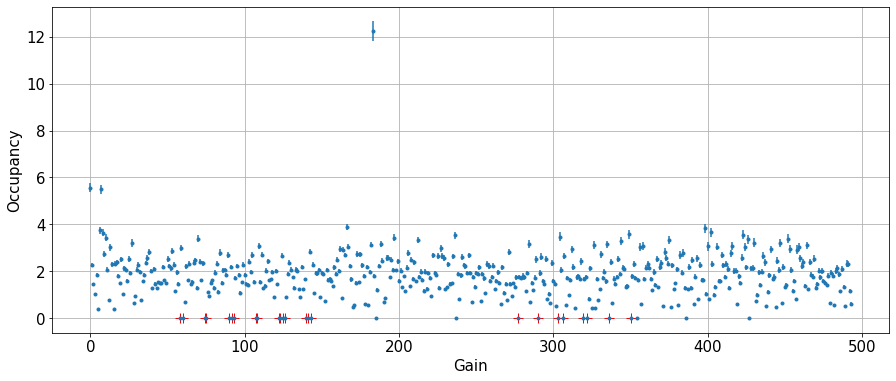

In [19]:
plt.figure(figsize=(15, 6))
plt.errorbar(Gain['channel'], Gain['gain'], yerr=Gain['gain error'],
             fmt='.')
plt.plot(bad_ch, np.zeros(len(bad_ch)), 'r+', ms=10)
plt.xlabel('Gain', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()

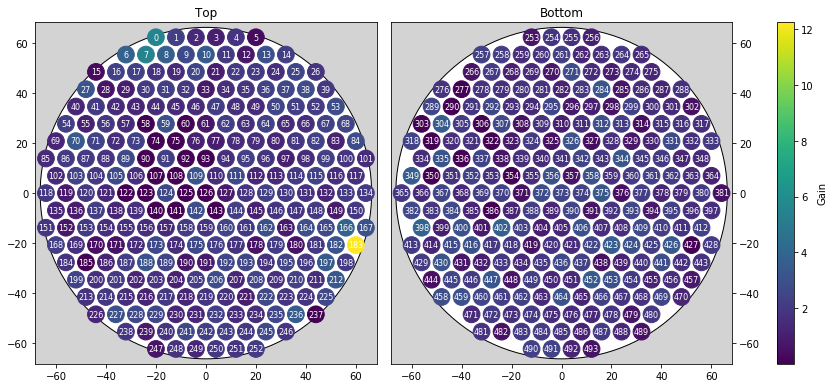

In [20]:
straxen.plot_pmts(Gain['gain'], vmin=0.01, label=f'Gain')

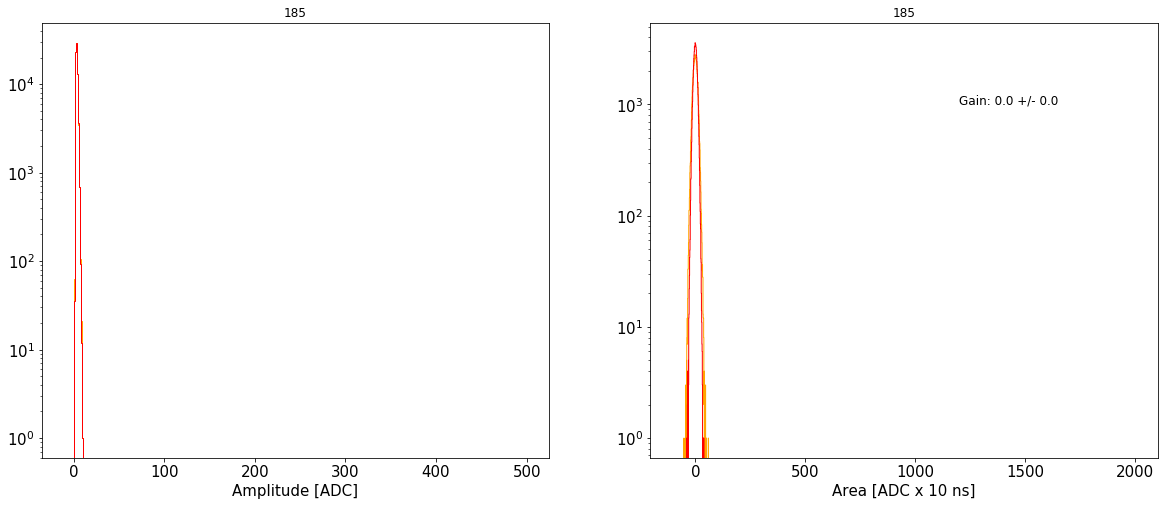

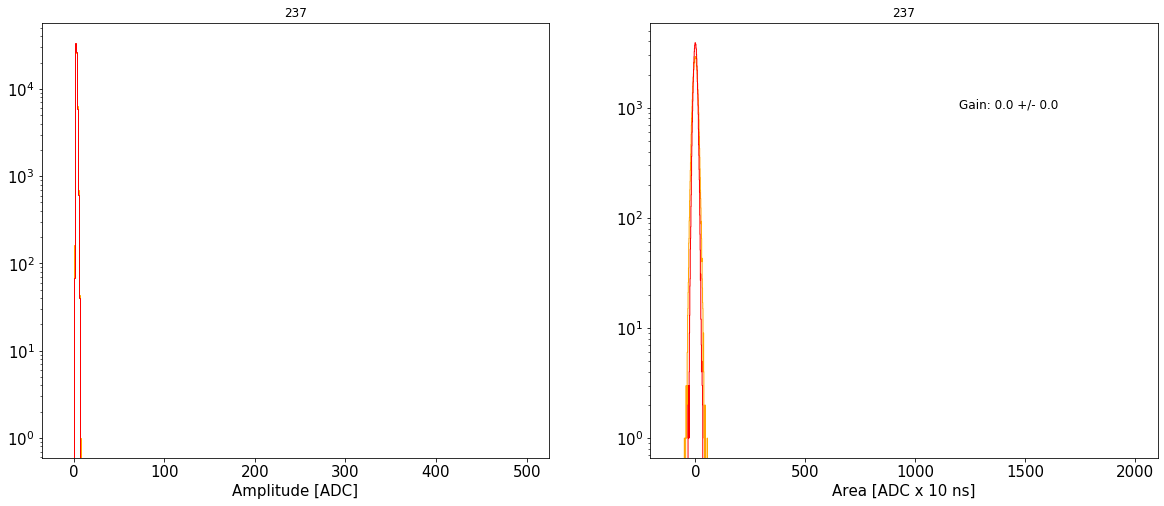

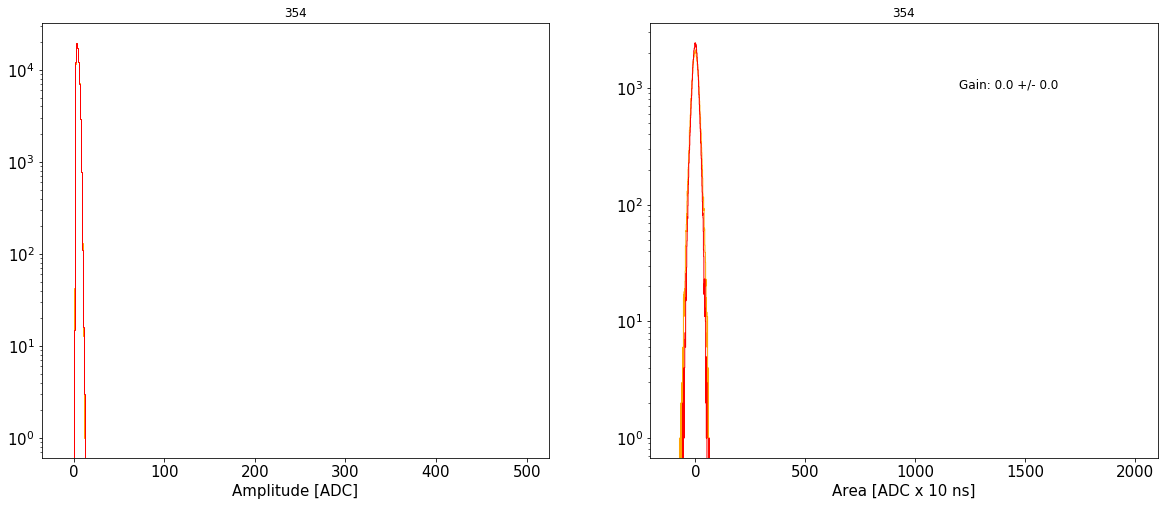

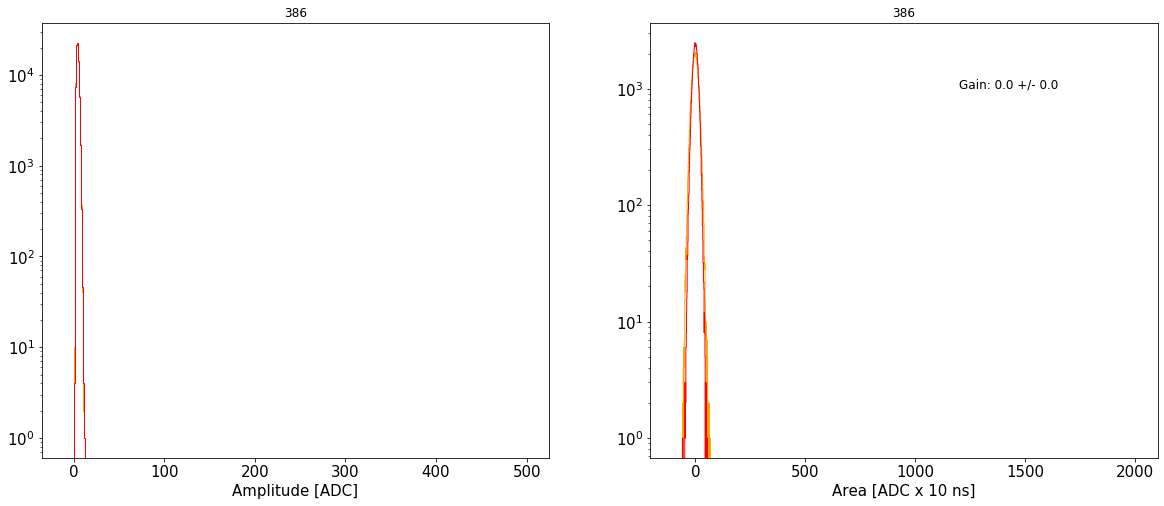

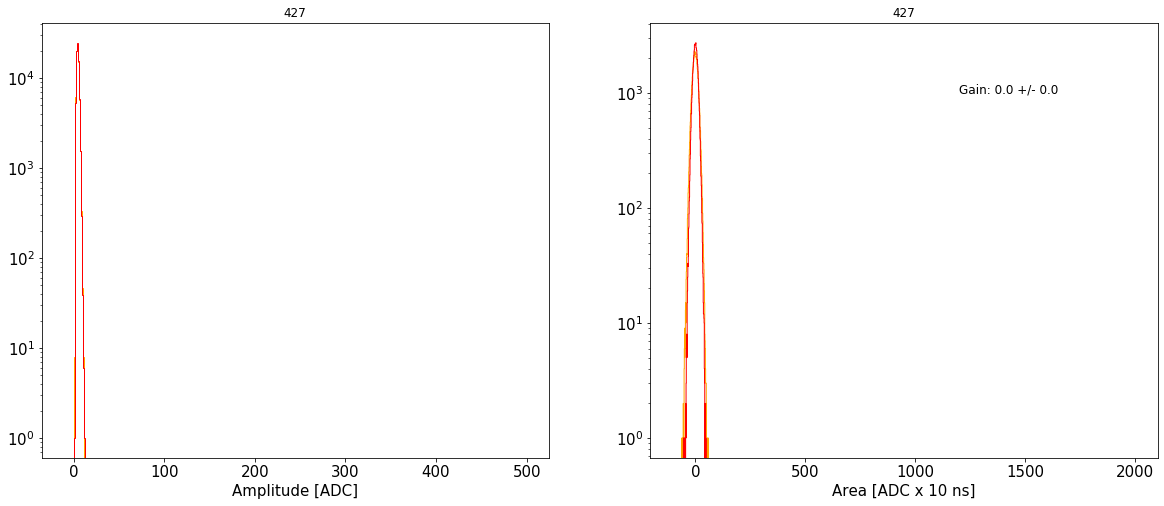

In [21]:
strange_ch = Gain[Gain['gain']<=0]['channel']

for ch in strange_ch:
    if ch not in bad_ch:
        plt.figure(figsize=(20, 8))

        plt.subplot(121)
        ADC = np.arange(-10, 500, 1)
        plt.hist(data[data['channel']==ch]['amplitude_led'], bins=ADC, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['amplitude_noise'], bins=ADC, histtype='step',color='red')
        plt.title(str(ch))
        plt.xlabel('Amplitude [ADC]', fontsize=15)
        plt.tick_params(labelsize=15)
        plt.yscale('log')

        plt.subplot(122)
        ADC_area = np.arange(-100, 2000, 1)
        plt.hist(data[data['channel']==ch]['area_led'], bins=ADC_area, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['area_noise'], bins=ADC_area, histtype='step',color='red')
        plt.title(str(ch))
        plt.xlabel('Area [ADC x 10 ns]', fontsize=15)
        plt.tick_params(labelsize=15)
        plt.text(x=1200, y=1e3, 
                 s='Gain: ' + str(Gain[Gain['channel']==ch]['gain'][0])+' +/- '
                   +str(Gain[Gain['channel']==ch]['gain error'][0]), fontsize=12)
        plt.yscale('log')

        plt.show()

### SPE acceptance computation

In [22]:
led_amp = np.zeros(len(data), dtype = np.dtype([('channel', 'int16'), ('amplitude_led', 'float64')]))
noise_amp = np.zeros(len(data), dtype = np.dtype([('channel', 'int16'), ('amplitude_noise', 'float64')]))
led_amp['channel'] = data['channel']
led_amp['amplitude_led'] = data['amplitude_led']
noise_amp['channel'] = data['channel']
noise_amp['amplitude_noise'] = data['amplitude_noise']

In [23]:
SPE = PMT.get_scalingspectrum(led_amp, noise_amp, channels, bad_ch)

In [24]:
SPE_acceptance = PMT.get_speacceptance(led_amp, noise_amp, channels, bad_ch)

/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/PMTanalysis.py:440: RuntimeWarning: divide by zero encountered in true_divide
  res =  1. - np.cumsum(diff)/np.sum(diff)
/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/PMTanalysis.py:440: RuntimeWarning: invalid value encountered in true_divide
  res =  1. - np.cumsum(diff)/np.sum(diff)
/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/PMTanalysis.py:445: RuntimeWarning: invalid value encountered in less
  pos_acc90 = np.where(res<0.9)


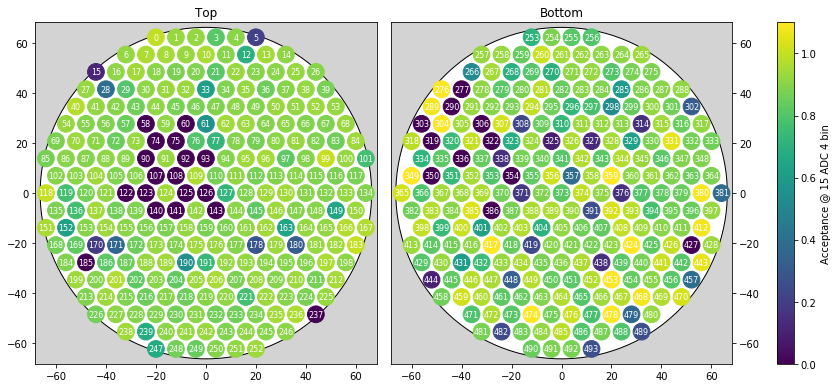

In [25]:
i = 4
straxen.plot_pmts(SPE_acceptance['Acceptance @ 15 ADC '+str(i)+' bin'], vmin=0.00, 
                  label=f'Acceptance @ 15 ADC '+str(i)+' bin')


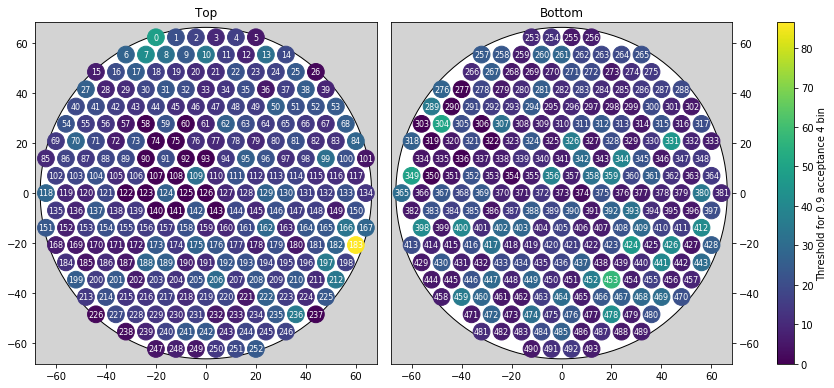

In [26]:
i = 4
straxen.plot_pmts(SPE_acceptance['Threshold for 0.9 acceptance '+str(i)+' bin'], vmin=0.00, 
                  label=f'Threshold for 0.9 acceptance '+str(i)+' bin')


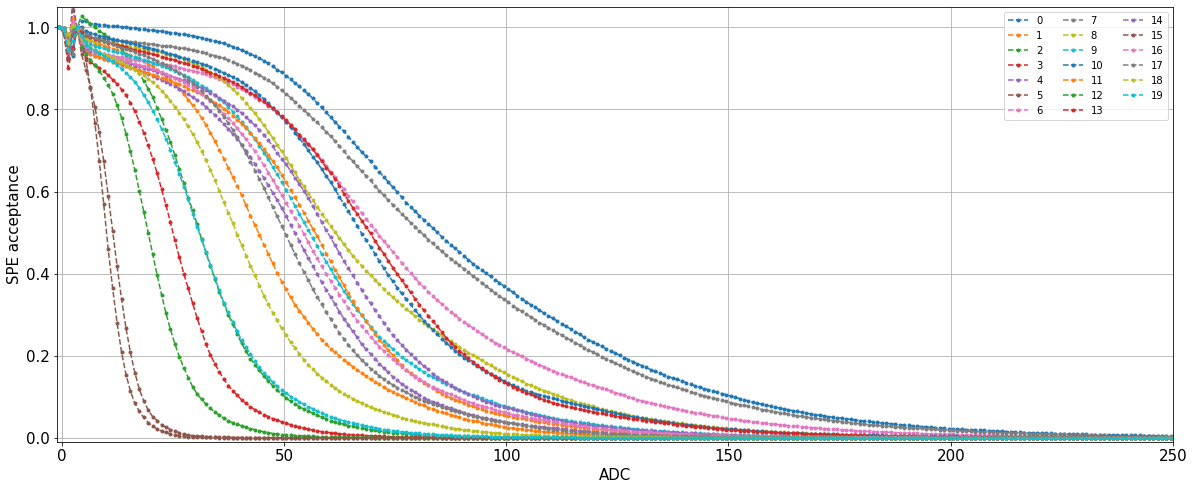

In [27]:
i=4
plt.figure(figsize=(20, 8))
for ch in range(20):
#ch = 0
    plt.plot(SPE_acceptance[SPE_acceptance['channel']==ch]['bins SPE acceptance '+str(i)+' bin'][0], 
             SPE_acceptance[SPE_acceptance['channel']==ch]['SPE acceptance '+str(i)+' bin'][0],
             '--.',
             label=str(ch))

plt.xlabel('ADC', fontsize=15)
plt.ylabel('SPE acceptance', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(-1, 250)
plt.ylim(-0.01, 1.05)
plt.legend(loc=0, ncol=3)
plt.grid()
plt.show()

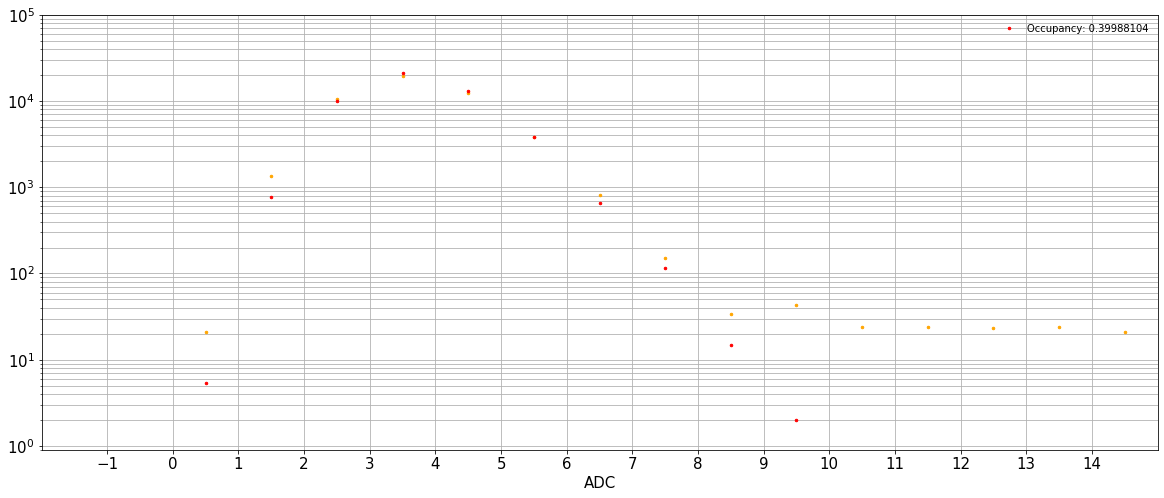

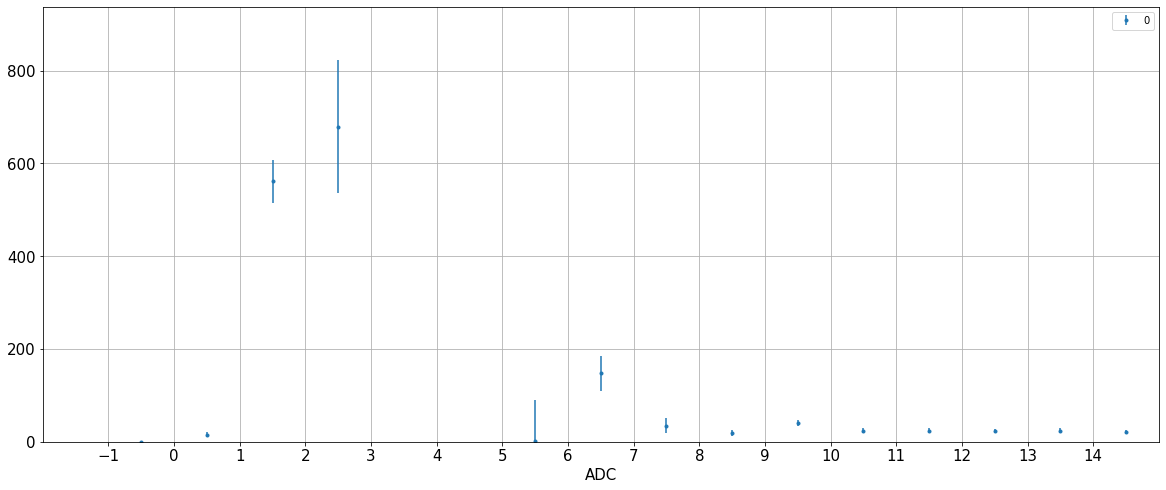

In [28]:
i=4
#for ch in range(20):
ch = 0
plt.figure(figsize=(20, 8))
mid_led   = 0.5*(SPE[SPE['channel']==ch]['bins led'][0][1:] + SPE[SPE['channel']==ch]['bins led'][0][:-1])
mid_noise = 0.5*(SPE[SPE['channel']==ch]['bins noise'][0][1:] + SPE[SPE['channel']==ch]['bins noise'][0][:-1])
plt.plot(mid_led,
         SPE[SPE['channel']==ch]['spectrum led'][0],
         color='orange', marker='.', linestyle='', linewidth=2, markersize=5,
         drawstyle ='steps')
plt.plot(mid_noise,
         SPE[SPE['channel']==ch]['spectrum noise scaled '+str(i)+' bin'][0],
         color='red', marker='.', linestyle='', linewidth=2, markersize=5,
         drawstyle ='steps', label='Occupancy: ' + str(SPE[SPE['channel']==ch]['occupancy '+str(i)+' bin'][0]))

x_ = [i for i in range(-1, 15)]
plt.xticks(x_)
plt.xlabel('ADC', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(-2, 15)
plt.ylim(0.9e0, 1e5)
plt.legend(loc=0, frameon=False)
plt.grid(which="both")
plt.yscale('log')
plt.show()

plt.figure(figsize=(20, 8))
plt.errorbar(SPE_acceptance[SPE_acceptance['channel']==ch]['bins SPE acceptance '+str(i)+' bin'][0], 
             SPE_acceptance[SPE_acceptance['channel']==ch]['noise-subtracted spectrum '+str(i)+' bin'][0],
             yerr= SPE_acceptance[SPE_acceptance['channel']==ch]['error of noise-subtracted spectrum '+str(i)+' bin'][0],
             fmt='.',
             label=str(ch))

x_ = [i for i in range(-1, 15)]
plt.xticks(x_)
plt.xlabel('ADC', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(-2, 15)
plt.ylim(0)
plt.legend(loc=0, ncol=3)
plt.grid()
plt.show()